In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
 

C:\Users\atakan.kececi\AppData\Local\Temp\ipykernel_5072\2859333052.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [5]:
dataset = pd.read_csv(r"C:\Users\atakan.kececi\Desktop\AI_Calismalar\datas\Salary_Data.csv")
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [6]:
dataset.shape


(30, 2)

In [5]:
#observation satır gözlem demek
#feature sütun demek

In [7]:
#y = b0 + b1*x
X = dataset.drop(['Salary'], axis=True)
y = dataset['Salary']

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((24, 1), (6, 1), (24,), (6,))

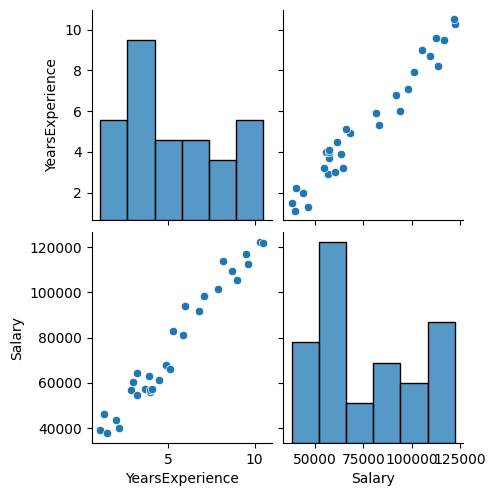

In [10]:
sns.pairplot(dataset) #genel olarak bu tarz basit problemlerde az featurelı durumda ne kullanacağımız konusunda fikir sahibi olmak için kullanılabilir

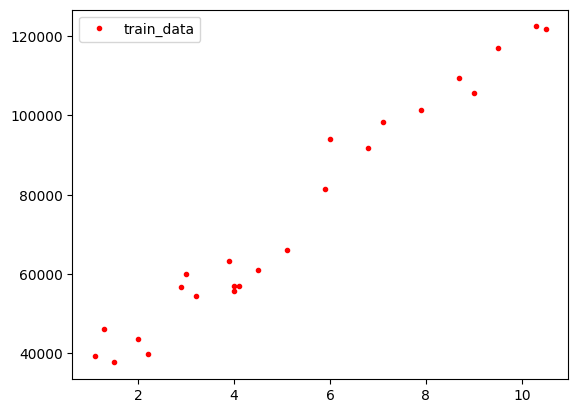

In [11]:
plt.plot(X_train,y_train,'r.',label='train_data')
plt.legend()
plt.show()

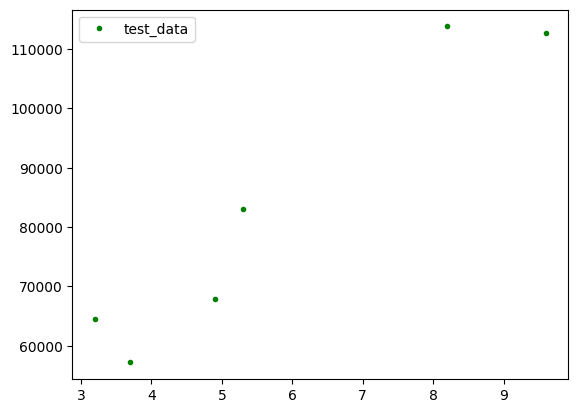

In [12]:
plt.plot(X_test,y_test,'g.',label='test_data')
plt.legend()
plt.show()

In [13]:
#TRAIN
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [14]:
y_pred = regressor.predict(X_test).round(1) #Buradaki round virgülden sonra bir basamak olması için


In [16]:
hesaplama = pd.DataFrame(np.c_[y_test,y_pred], columns=['Actual Salary','Predicted Salary'])
hesaplama

,Actual Salary,Predicted Salary
0,112635.0,115790.2
1,67938.0,71498.3
2,113812.0,102596.9
3,83088.0,75267.8
4,64445.0,55477.8
5,57189.0,60189.7


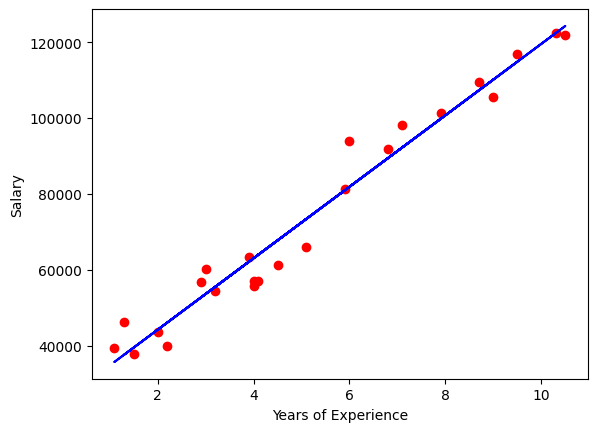

In [17]:
plt.scatter(X_train,y_train,color = 'red')
plt.plot(X_train,regressor.predict(X_train),color='blue')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

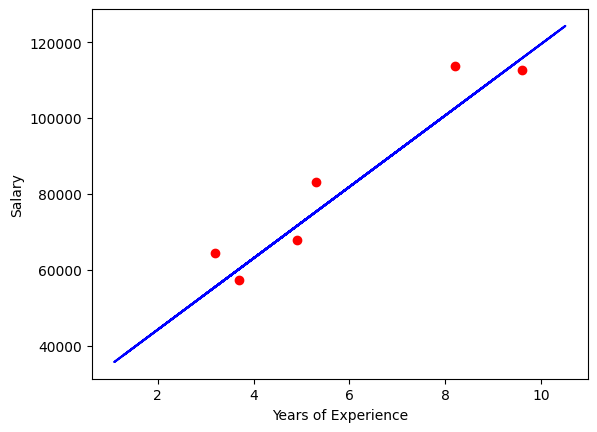

In [18]:
plt.scatter(X_test,y_test,color = 'red')
plt.plot(X_train,regressor.predict(X_train),color='blue')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [19]:
#Küçük ve orta boy verilerde çok veri yoksa %70 veya %80'lik seçimler model başarısını elde eder.
#Veri miktarı arttıkça train miktarını azaltmak gerekiyor.
#Çok büyük verilerde %50 train , %50 test kullanılabilir